In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
os.chdir('C:\\Users\\User\\Downloads')

In [3]:
# We read the data
raw_data=pd.read_csv('SampleSuperstore.csv')
raw_data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# We make a copy of the data to work upon.
# We check whether there are missing values in the columns
data=raw_data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 702.8+ KB


In [5]:
# we check the data types of the columns
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

**We can see that there is no missing data in the columns.**

In [6]:
#checking missing values in rows
data[data.isnull().any(axis=1)].head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


**There is no missing value in the rows.**

In [7]:
#checking the unique values
data.describe(include='all').loc['unique', :]

Ship Mode         4
Segment           3
Country           1
City            531
State            49
Postal Code     NaN
Region            4
Category          3
Sub-Category     17
Sales           NaN
Quantity        NaN
Discount        NaN
Profit          NaN
Name: unique, dtype: object

In [8]:
data['Country'].unique()

array(['United States'], dtype=object)

**We can see that there is only one unique value for the column 'Country'.
The data is specific to United states. Therefore we can remove this column.**

In [9]:
# Dropping the Country Column
data=data.drop('Country',axis=1)

In [10]:
# Altered Data
data.head()

,Ship Mode,Segment,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
# we look at the data statistics
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


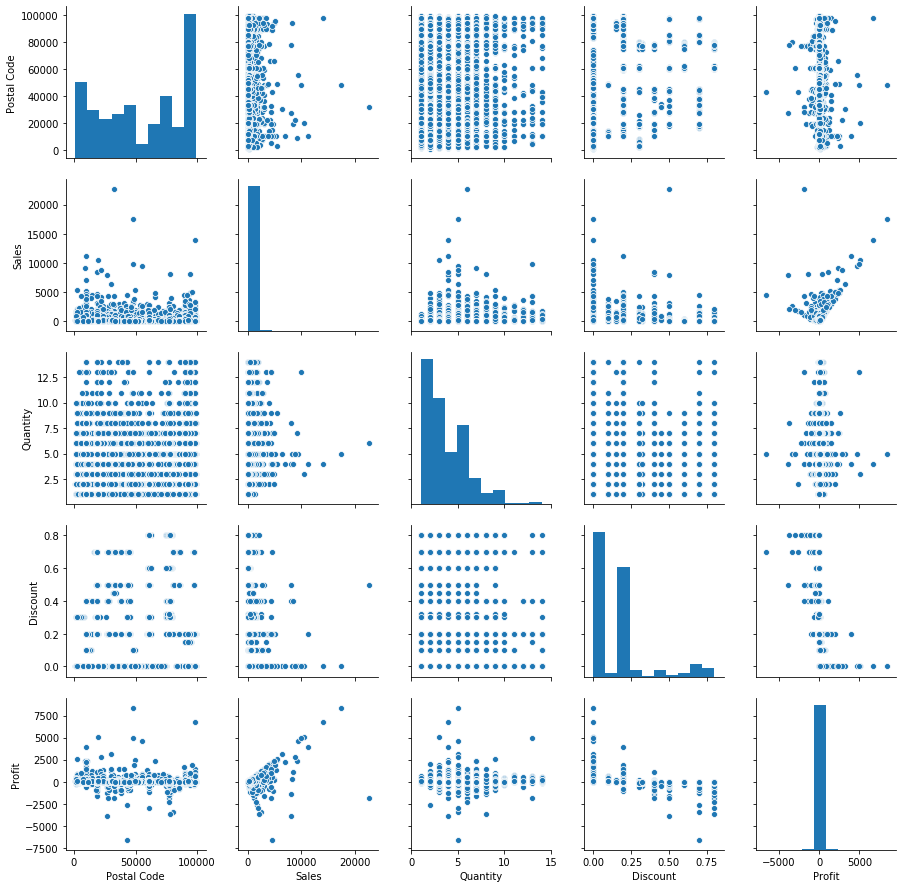

In [12]:
# plotting the graphs between various players
sns.pairplot(data)
plt.show()

**From the above graphs we can see that there is a correlation between profit and sales. As the sales increase so does the profit, which is as it should be.
We also see that when the Dicount is minimum the Profit is more than when the Discount is maximum. So, the company should refrain from offering maximum Discount.**

# **Exploring Categories and Sub Categories**

In [13]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [14]:
data['Sub-Category'].unique()

array(['Bookcases', 'Chairs', 'Labels', 'Tables', 'Storage',
       'Furnishings', 'Art', 'Phones', 'Binders', 'Appliances', 'Paper',
       'Accessories', 'Envelopes', 'Fasteners', 'Supplies', 'Machines',
       'Copiers'], dtype=object)

In [15]:
data['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [16]:
data['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

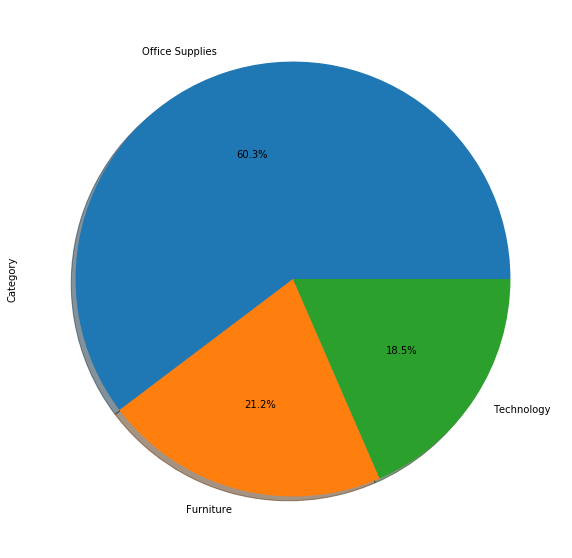

In [17]:
plt.figure(figsize=(16,10))
data['Category'].value_counts().plot.pie(shadow=True,autopct="%1.1f%%")
plt.show()

**The company has more Office Supplies vareities than other categories.**

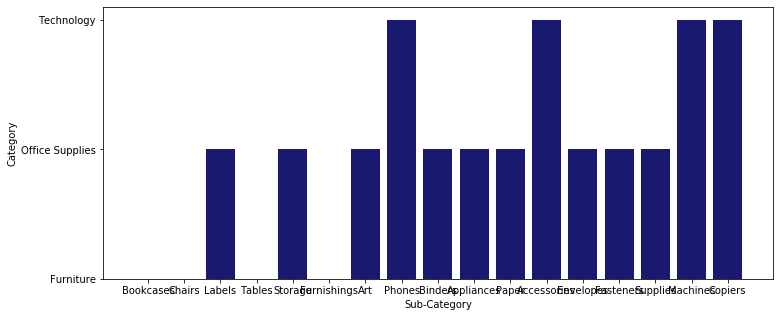

In [18]:
plt.figure(figsize=(12,5))
plt.bar('Sub-Category','Category', data=data, color='midnightblue')
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()

**From the above graph we can see which Sub-Category belongs to which Category.**

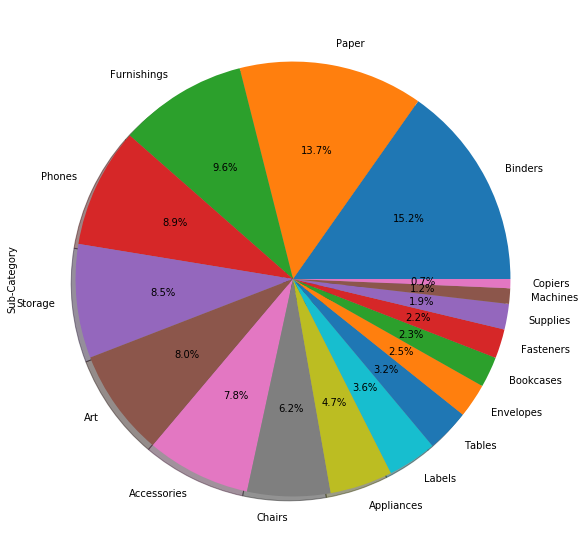

In [19]:
plt.figure(figsize=(16,10))
data['Sub-Category'].value_counts().plot.pie(shadow=True,autopct="%1.1f%%")
plt.show()

**From the Office Supplies, Binders and Papers are having the most vareities.**

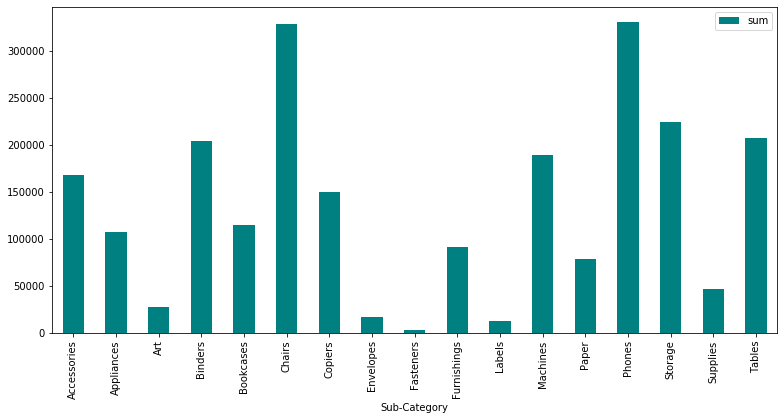

In [20]:
data.groupby('Sub-Category')['Sales'].agg(['sum']).plot.bar(figsize=(13,6),color='teal')
plt.show()

**From the above graph we can see that the most sales are for Chairs and Phones.
The sales for Fasteners, Labels, Envelope and Art is relatively low.**

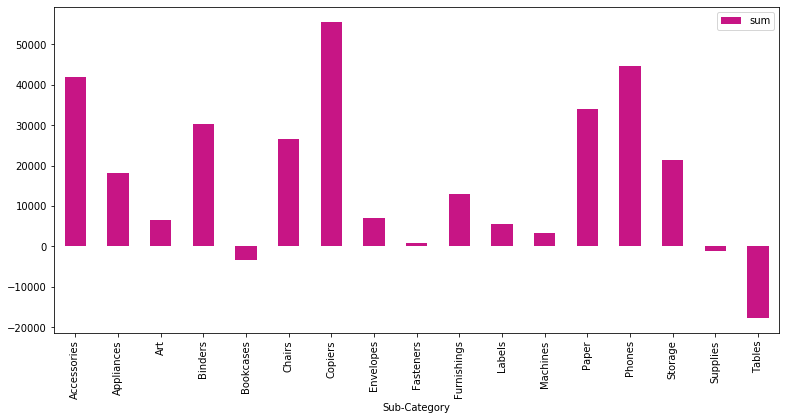

In [21]:
data.groupby('Sub-Category')['Profit'].agg(['sum']).plot.bar(figsize=(13,6),color='mediumvioletred')
plt.show()

**The highest Profit comes from Copiers.**

**From the above graphs, we infer that the company should stop producing Fasteners and can also do away with Supplies.
Also, the Bookcases and Tables have a negative Profit therefore the company should work on these sub-categories.**

# Exploring Region, States and Cities

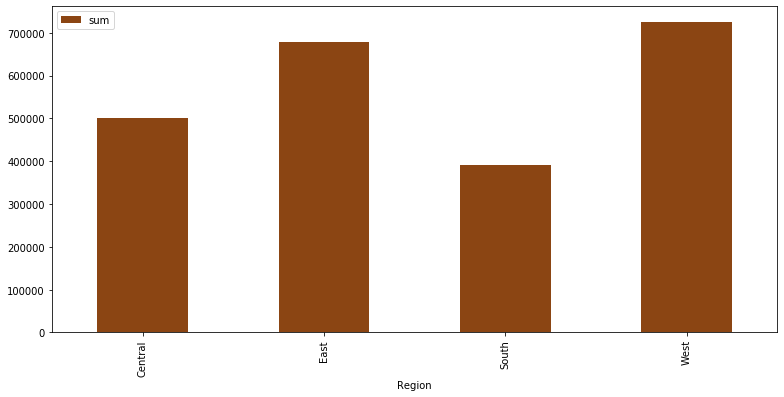

In [22]:
data.groupby('Region')['Sales'].agg(['sum']).plot.bar(figsize=(13,6),color='saddlebrown')
plt.show()

**People from the west region order more from the store.**

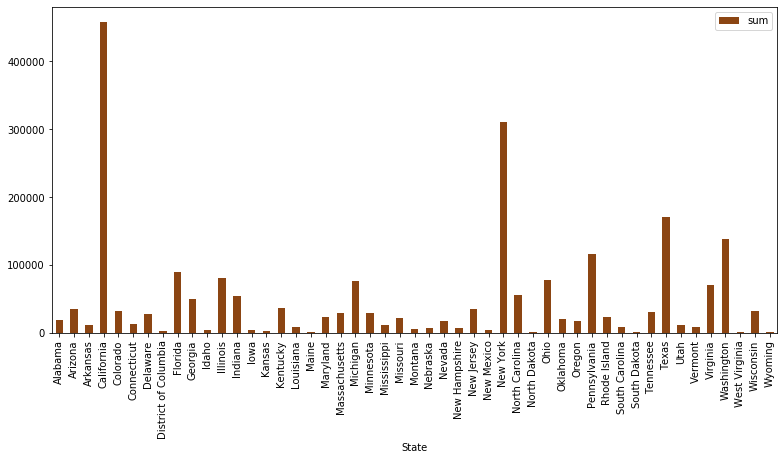

In [23]:
data.groupby('State')['Sales'].agg(['sum']).plot.bar(figsize=(13,6),color='saddlebrown')
plt.show()

**People from California order the most from the store.**

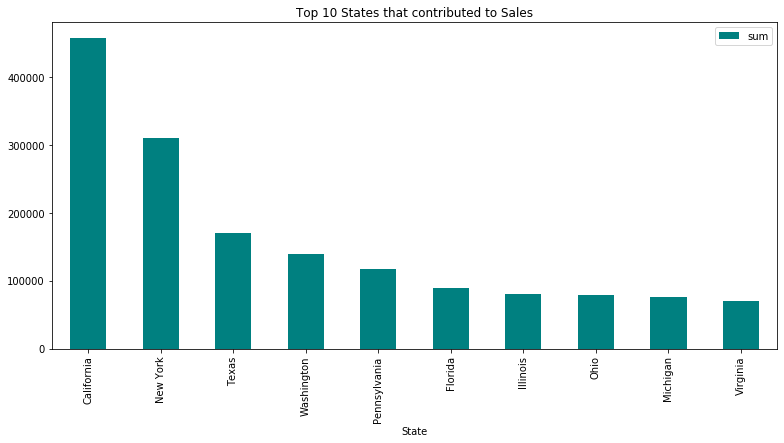

In [24]:
data.groupby('State')['Sales'].agg(['sum']).sort_values( by='sum',ascending=False).head(10).plot.bar(figsize=(13,6),color='teal')
plt.title('Top 10 States that contributed to Sales')
plt.show()

**California is the State with the most Sales.**

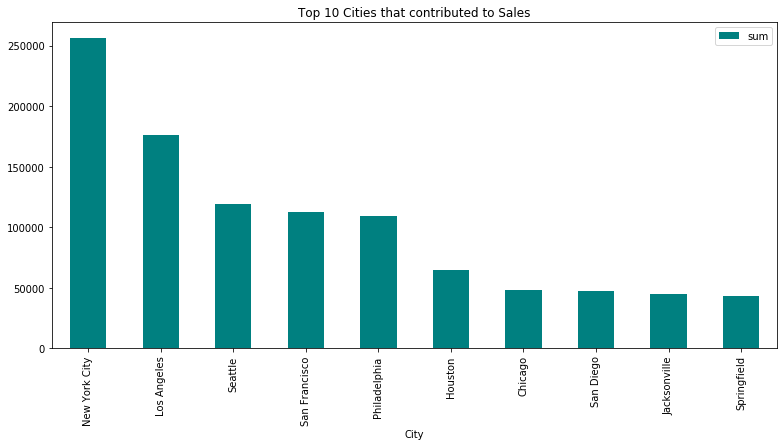

In [101]:
data.groupby('City')['Sales'].agg(['sum']).sort_values( by='sum',ascending=False).head(10).plot.bar(figsize=(13,6),color='teal')
plt.title('Top 10 Cities that contributed to Sales')
plt.show()

**New York City is the city with the most Sales.**

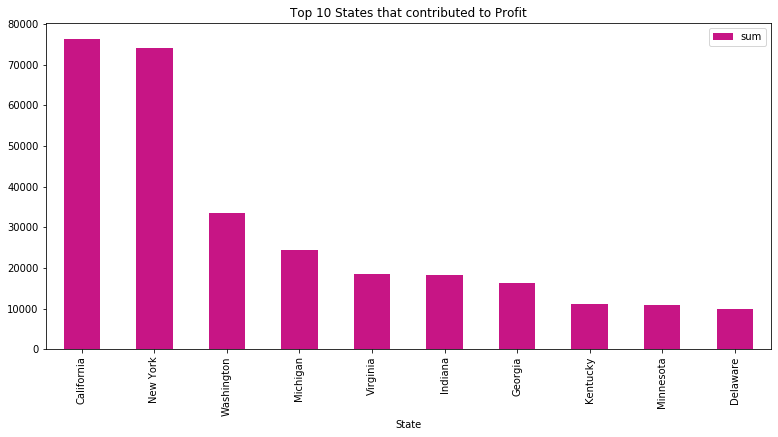

In [25]:
data.groupby('State')['Profit'].agg(['sum']).sort_values( by='sum',ascending=False).head(10).plot.bar(figsize=(13,6),color='mediumvioletred')
plt.title('Top 10 States that contributed to Profit')
plt.show()

**California and New York are the most profitable States.**

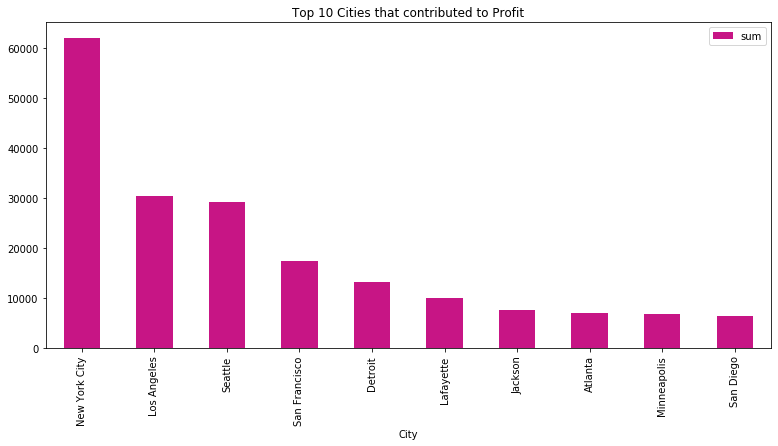

In [26]:
data.groupby('City')['Profit'].agg(['sum']).sort_values( by='sum',ascending=False).head(10).plot.bar(figsize=(13,6),color='mediumvioletred')
plt.title('Top 10 Cities that contributed to Profit')
plt.show()

**New York City is the most profitable City.**

# **Insights on Segments and Ship Modes**

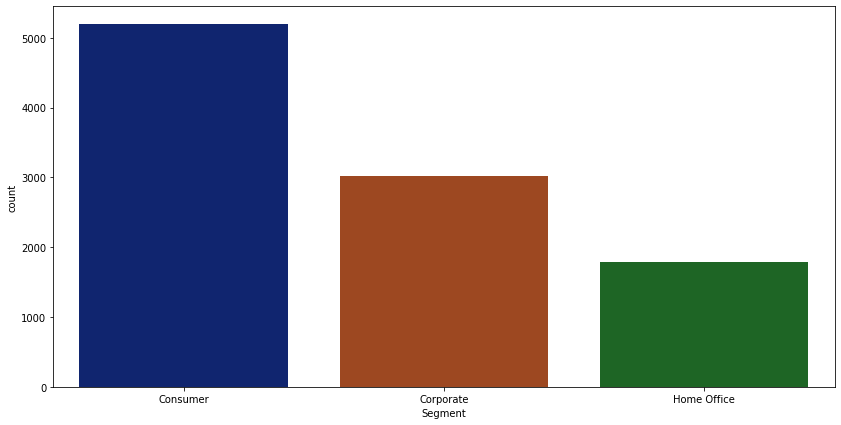

In [27]:
plt.figure(figsize=(14,7))
sns.set_palette("dark")
sns.countplot(x="Segment", data=data)
plt.show()

**The Consumer Segment orders the most from the store.**

In [28]:
data.groupby('Ship Mode')['Segment'].value_counts().sort_values(ascending=False)

Ship Mode       Segment    
Standard Class  Consumer       3085
                Corporate      1812
                Home Office    1071
Second Class    Consumer       1020
First Class     Consumer        769
Second Class    Corporate       609
First Class     Corporate       485
Same Day        Consumer        317
Second Class    Home Office     316
First Class     Home Office     284
Same Day        Corporate       114
                Home Office     112
Name: Segment, dtype: int64

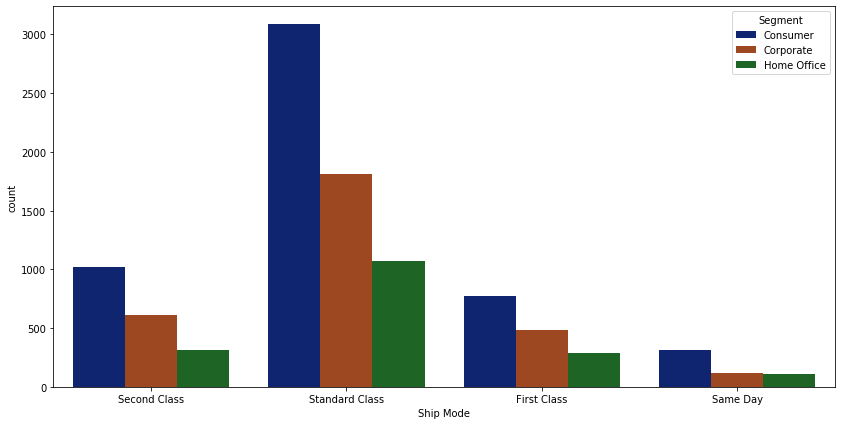

In [29]:
plt.figure(figsize=(14,7))
sns.set_palette("dark")
sns.countplot(x="Ship Mode", hue="Segment", data=data)
plt.show()

**The Consumer Segment orders the most by Standard Class shipping mode.**

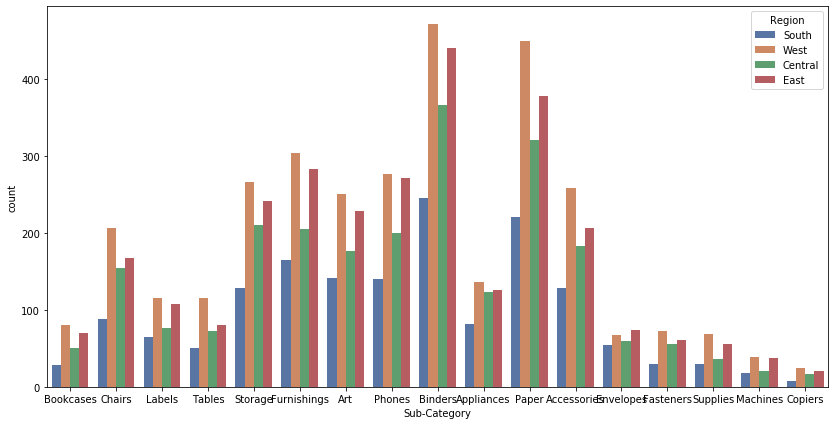

In [30]:
plt.figure(figsize=(14,7))
sns.set_palette("deep")
sns.countplot(x="Sub-Category", hue="Region", data=data)
plt.show()

**From the above graph one can know which Region  prefers which Sub-Category.**